In [ ]:
# Basic Visualization & Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations


In [ ]:
# Read in csv file
file = pd.read_csv("Relshare.csv")
file = file.fillna(-50)

In [ ]:
file

,Unnamed: 0,Age,gender,number,ID1,ID2,satisfaction,partnerliking,mutuality,relationship length,...,love of learning2,partnerIT2,selfIT2,extroversion2,agreeableness2,conscientiousness2,stability2,openness2,age2,gender2
0,1,0,0,2,0,87,5.00,6.8,6.4,6,...,5.000000,6.0,4.833333,3.5,6.0,6.0,6.0,5.5,0,1
1,2,1,0,3,1,115,5.50,5.8,6.2,6,...,7.000000,5.0,6.833333,3.5,5.0,6.0,4.5,6.5,0,1
2,3,2,0,5,2,3,5.25,6.8,6.8,6,...,6.333333,7.0,5.833333,5.0,6.0,7.0,6.0,6.0,2,1
3,4,2,1,7,3,2,4.50,6.8,6.6,6,...,6.333333,6.0,6.333333,6.0,6.5,7.0,6.0,6.0,2,0
4,5,0,1,9,4,88,5.00,6.8,6.8,6,...,5.333333,6.0,4.666667,1.5,5.0,4.5,5.0,1.5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,148,3,0,99,147,68,5.25,7.0,6.8,4,...,6.333333,7.0,5.666667,2.5,6.5,4.0,1.5,7.0,3,1
148,149,1,0,100,148,83,4.75,6.2,6.6,6,...,6.000000,5.0,4.666667,5.5,4.0,4.0,4.0,5.0,1,0
149,150,2,0,101,149,82,5.00,7.0,5.6,6,...,5.333333,5.0,6.000000,3.5,5.0,5.5,3.0,4.0,2,1
150,151,1,0,102,150,79,4.75,6.4,6.6,6,...,NaN,6.0,7.000000,2.0,4.5,7.0,3.5,6.5,0,1


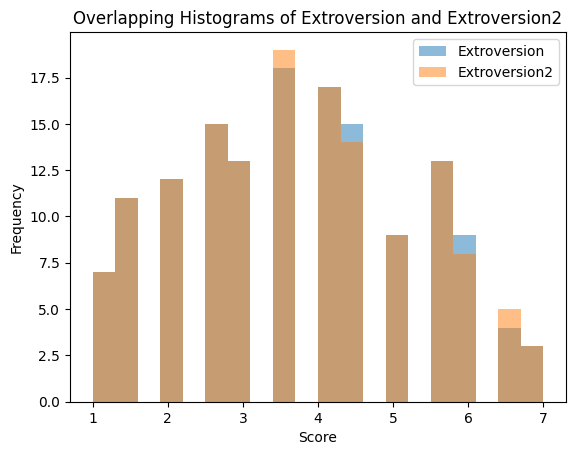

In [ ]:
# prompt: overlapping histograms on the same plot of extroversion and extroversion 2

plt.hist(file['extroversion'], bins=20, alpha=0.5, label='Extroversion')
plt.hist(file['extroversion2'], bins=20, alpha=0.5, label='Extroversion2')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Extroversion and Extroversion2')
plt.legend(loc='upper right')
plt.show()

(array([18., 12., 15., 13., 19., 31.,  9., 13.,  8.,  8.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

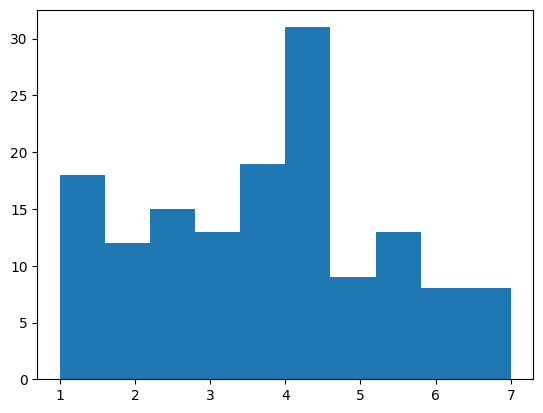

In [ ]:
plt.hist(file['extroversion2'])

(array([ 4.,  2., 16., 21., 25., 23., 22., 19., 10.,  4.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

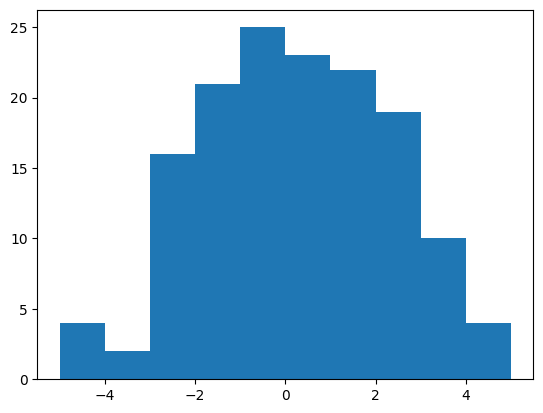

In [ ]:
plt.hist(file['extroversiondiff'])

In [ ]:
plt.scatter(file['extroversiondiff'], file['satisfactiondiff'])

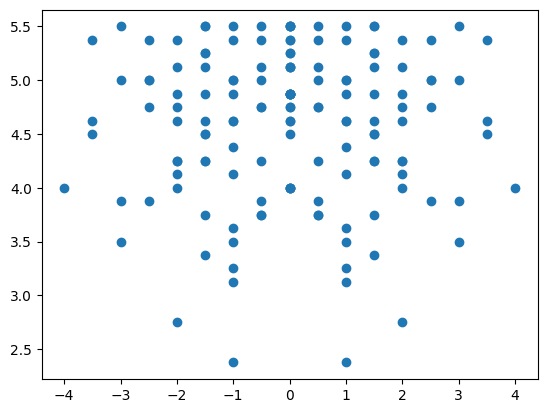

In [ ]:
# prompt: make a new column averaging the satisfaction and satisfaction2 data points and label it "satisfactionaverage"

file['satisfactionaverage'] = (file['satisfaction'] + file['satisfaction2']) / 2
plt.scatter(file['opennessdiff'], file['satisfactionaverage'])

In [ ]:
# Map string -> float values
# TODO: Put age values in order
def map_values(old_df, id_pairs):
    df = old_df
    for id_pair in id_pairs:
        unique_values = pd.concat([df[id_pair[0]],df[id_pair[1]]]).unique()
        value_to_int_map = {value: idx for idx, value in enumerate(unique_values)}
        for column in id_pair:
            if column not in df.columns:
                print(f'Errror: Column {column} does not exist.')
                return None
            df[column] = df[column].map(value_to_int_map)

        print("Mapping of unique values to integers:")
        for value, idx in value_to_int_map.items():
            print(f"{value} -> {idx}")

    return df
new_df = map_values(file, [["Age","age2"],["gender","gender2"],['ID1', 'ID2'],['ID3', 'ID4']])

Mapping of unique values to integers:
45-54 -> 0
35-44 -> 1
55-64 -> 2
18-24 -> 3
25-34 -> 4
-50 -> 5
Mapping of unique values to integers:
Female -> 0
Male -> 1
-50 -> 2
Mapping of unique values to integers:
5654a29404212700104a1d0e -> 0
6146f00304ffc2626b914d5e -> 1
5ee64d0bf796cb3b252a8c99 -> 2
5ea00a8a39c0f00008064b2b -> 3
5a972432873cda0001dc9321 -> 4
5dc7f4daa6eae358b81c34d9 -> 5
60d8d3832eca72602139cfdd -> 6
5bffc3ae4108380001f5cd63 -> 7
5e36965ded5a2b62bf438768 -> 8
5f0cb319d29147695796a208 -> 9
59400f1c6b84600001e76c13 -> 10
5e791235c7d30f00096255e0 -> 11
5af4579eb625f70001e0cfad -> 12
5eee87f13994e73429924805 -> 13
5def4e6e09c1075da1ee992b -> 14
5fc74b5900f0a5079e03dbae -> 15
5ed917ec0318c6466f50a0a6 -> 16
5c867a35b5bfcb00115af368 -> 17
5fcf61cae339e601668c71aa -> 18
62974bf0b641c08a1f88cfff -> 19
60919018ce223dc3906d7a7e -> 20
5b743152fd718d00013d2014 -> 21
5a9c1988f6dfdd0001ea9933 -> 22
60f984adfea10999e9a39727 -> 23
5e1de1181dcc4c144a683022 -> 24
5ee9e46e9087b300082d46cd -

In [ ]:
# Check for no string values
nan_count = new_df.isna().sum()
print(nan_count)

Unnamed: 0               0
Age                      0
gender                   0
number                   0
ID1                      0
ID2                      0
satisfaction             0
partnerliking            0
mutuality                0
relationship length      0
commitment               0
honesty                  0
love of learning         0
partnerIT                0
partnerOC                0
selfIT                   0
extroversion             0
agreeableness            0
conscientiousness        0
stability                0
openness                 0
ID3                      0
ID4                      0
satisfaction2            0
partnerliking2           0
mutuality2               0
length2                  0
commitment2              0
honesty2                 0
love of learning2        0
partnerIT2               0
selfIT2                  0
extroversion2            0
agreeableness2           0
conscientiousness2       0
stability2               0
openness2                0
a

In [ ]:
# Do K-means
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(new_df, 3)
kmeans = pd.DataFrame(clust_labels)
new_df.insert((new_df.shape[1]),'kmeans',kmeans)

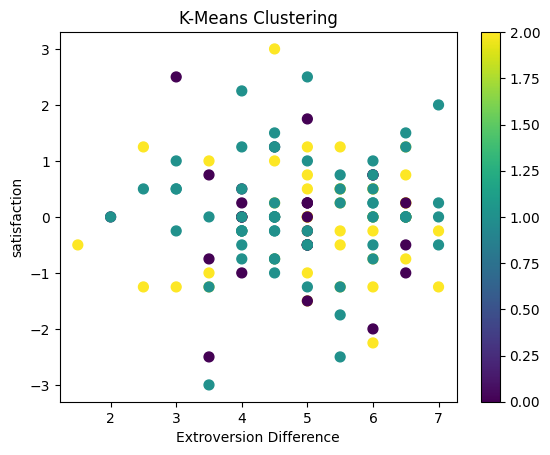

In [ ]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_df['agreeableness'],new_df['satisfactiondiff'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Extroversion Difference')
ax.set_ylabel('satisfaction')
plt.colorbar(scatter)